# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: Erick Spinelli Pimentel__</center>

#Importando as Bibliotecas

In [80]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math, scipy, numpy as np
from scipy import linalg
import pandas as pd
import random
random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

#INTRODUÇÃO

A análise de Regressão consiste na realização de uma análise estatística com objetivo de verificar a existência de uma relação funcional entre uma variável dependente com uma ou 
mais variáveis independentes **(obtenção de uma equação que tenta explicar a variação da variavel dependente pela variação dos niveis das variaveis independentes)**.

Para tentar estabelecer uma equação que representa o fenômeno em estudo pode-se fazer um gráfico, chamado de diagrama de dispersão, para verificar como se comportam os valores da variável dependente (Y) em função da variável independente (X). O comportamento de **Y em relação à X** pode-se apresentar de diversas maneiras: linear, quadrático, cúbico, exponencial, logarítmico, etc. Para se estabelecer o modelo para explicar o fenômeno, deve-se verificar **qual tipo de curva e equação de um modelo matemático que mais se aproxime dos pontos representados no diagrama de dispersão**.

Nesse projeto será mostrado como **implementar Regressão Linear**, será abordado **o problema dos Quadrados Minimos** e alguns metodos de resolução, como: Solução Simples, **Decomposição de Cholesky**, **Decomposição QR**, **Decomposição de Valores Singulares (DVS/SVD)**. Serão trabalhados dois bancos de dados: o primeiro sobre pacientes com diabetes com 442 linhas (amostras) e 10 colunas (variaveis) e o segundo sobre valor de imóveis com 5000 linhas (amostras) e 3 colunas (variaveis).

Motivação:
Um dos questionamentos advindos da motivação para o aprendizado do tema é "Não posso simplesmente usar a biblioteca de Regressão Linear do sci-kit learn?" Sim, é possivel pois os algoritmos que serão abordados aqui ja estão implementados na maioria das bibliotecas, mas é muito importante saber o que esta acontecendo em mais baixo nivel para poder melhor combina-los, personaliza-los e implementa-los.

#TEORIA REGRESSÃO LINEAR

A regressão linear é chamada "linear" porque se considera que a relação da resposta às variáveis é uma função linear de alguns parâmetros. Os modelos de regressão que não são uma função linear dos parâmetros se chamam modelos de regressão não-linear. Sendo uma das primeiras formas de análise regressiva a ser estudada rigorosamente, e usada extensamente em aplicações práticas. Isso acontece porque modelos que dependem de forma linear dos seus parâmetros desconhecidos, são mais fáceis de ajustar que os modelos não-lineares aos seus parâmetros, e porque as propriedades estatísticas dos estimadores resultantes são fáceis de determinar.

Modelos de regressão linear são frequentemente ajustados usando a abordagem dos mínimos quadrados, mas que também pode ser montada de outras maneiras, tal como minimizando a *falta de ajuste* em alguma outra norma (com menos desvios absolutos de regressão), ou através da minimização de uma penalização da versão dos mínimos quadrados. Por outro lado, a abordagem de mínimos quadrados pode ser utilizado para ajustar a modelos que não são modelos lineares. Assim, embora os termos mínimos quadrados e modelo linear estejam intimamente ligados, eles não são sinônimos.

- #### Equação da Regressão Linear
 $$y_i = \alpha + \theta X_i + \epsilon_i$$

em que:
- $y_i$: Variável dependente, representa o que o modelo tentará prever,
- $\alpha$: É uma constante, que representa a intercptação da reta com o eixo - vertical;
- $\theta$: Representa o coeficiente angular(inclinação) em relação à variavél
  $\theta$
- $X_i$; Variável independente
- $\epsilon_i$: Representa todos os fatores residuais mais os possíveis erros de medição. O seu comportamento é aleatório, d evido à natureza dos fatores que encerra. Para que essa fórmula possa ser aplicada, os erros devem satisfazer determinadas hipóteses, que são:
    - Terem distribuição normal
    - Mesma variância $\sigma^2$
    
- #### Notação Matricial
  
A equação acima pode ser reescrita em forma matricial, como:

$$y = X\theta + \epsilon$$

Em que $y$ é uma matriz de  ${\displaystyle n\times 1}$ observações, X é uma matriz de tamanho ${\displaystyle n\times p+1}$ sendo a primeira coluna com valores sempre = 1, representando a constante $\alpha$, e $p$ é a quantidade de variáveis explicativas), $\beta$ é uma matriz de ${\displaystyle p+1\times 1}$ variáveis explicativas(sendo que $\beta_0$ representa a constante $\alpha$) e $\epsilon$ é uma matriz de ${\displaystyle n\times 1}$ de resíduos.

$$\mathbf y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix} ,
\qquad \mathbf {X}=\begin{bmatrix}
1 & X_{11} & X_{12} & \cdots & X_{1p} \\
1 & X_{21} & X_{22} & \cdots & X_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & X_{n2} & \cdots & X_{np}
\end{bmatrix} ,
\qquad \boldsymbol \theta = \begin{bmatrix}
\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_p \end{bmatrix} ,
\qquad \boldsymbol \varepsilon = \begin{bmatrix}
\varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix}
$$

#DESCRIÇÃO DO PROBLEMA


##Problema dos Quadrados Minimos

Dataset para exemplificar e entender o problema dos quadrados minimos:

In [81]:
dados = pd.read_csv('/content/dataset.csv', sep=';')

In [82]:
dados = dados[['Valor', 'Area']]

In [83]:
dados.head()

,Valor,Area
0,4600000,280
1,900000,208
2,2550000,170
3,550000,100
4,2200000,164


Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel;</li>
    <li><b>Area</b> - Área do imóvel em m².</li>
</ul>

In [84]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])

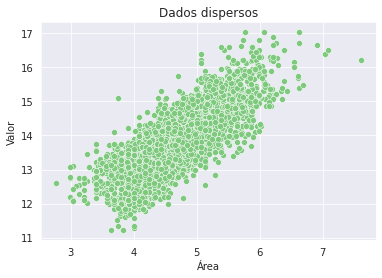

In [85]:
ax = sns.scatterplot(x=area, y=valor)
ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

Pode-se então definir uma hipótese a partir das constantes $\alpha$ e $\beta$ tal que:

$$y_i = \theta_1 x_i + \theta_0 + \epsilon_i$$

<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>$y_i$:</b> é o valor de um determinado imóvel</li>
    <li><b>$x_i$:</b> é a área deste mesmo imóvel</li>
    <li><b>$\epsilon_i$:</b> é o termo de erro (é esperado que seja pequeno)</li>
</ul>

Supondo que $\theta_1$ e $\theta_0$ são conhecidos, pode-se fazer uma previsão:

In [86]:
def prever(theta0, theta1, x_i):
    return theta1*x_i + theta0 

Como podem ser escolhidas as constantes $\theta_0$ e $\theta_1$?

Sabendo que é possivel calcular a saída prevista com a função "prever" e sabendo qual é a saída real, é possível calcular o erro de cada previsão fazendo a diferença entre a saída real e a saída prevista.

In [87]:
def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

No entanto esta função de erro calcula apenas o erro de uma saída, e não de todas elas. Ainda que pode-se ter uma saída com erro positivo cancelando uma outra saída com erro negativo. Então, deve-se somar todos os erros e elevá-los ao quadrado para que todos erros sejam positivos.

$$
EQM = \frac{1}{N}\sum^{N}_{i=0}(y_i - y^p_i)^2
$$

In [88]:
def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()

Agora pode-se ver a regressão como um problema de otimização. Deve-se minimizar esta função de soma dos erros quadráticos. Isto é um problema conhecido na algebra linear como **minímos quadrados** e sua resolução dá as equações:

$$\theta_1 = correlacao(x, y) \times \frac{\sigma(y)}{\sigma(x)}$$

$$\theta_0 = \bar{y} - \alpha\bar{x}$$

Sendo $\bar{x}$ e $\bar{y}$ as médias dos valores de x e y, correlação(x, y) é a correlação entre os valores de x e y, e $\sigma(x)$, $\sigma(y)$ os desvios padrões de x e y.

Assim, a função dos minimos quadrados minimizam os valores de $\theta_1$ e $\theta_0$. 

In [89]:
def minimos_quadrados(x, y):
    theta1 = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    theta0 = y.mean() - theta1 * x.mean()
    return theta1, theta0

Agora sim, é possivel escolher valores para $\theta_0$ e $\theta_1$ e fazer a regressão linear!

In [90]:
theta1, theta0 = minimos_quadrados(area, valor)

In [91]:
print(theta1)
print(theta0)

1.273136797389051
7.806465474455786


Para avaliar se a regressão está de fato fazendo a representação correta, é necessario verificar na função de erro:

In [92]:
soma_erro_quadratico_medio(prever(theta0, theta1, area), valor)

0.2922746317391325

Visualizando os resultados de forma grafica:

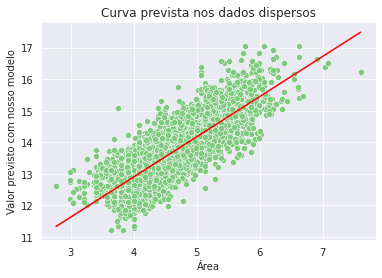

In [93]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1, area), color = 'red')
ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

## Limitações do métodos dos minímos quadrados:
Quando nosso problema não envolve apenas uma variável independente, pode ser que o método dos quadrados mínimos fique muito caro do ponto de vista computacional. Este problema foi resolvido apenas para uma variável (área), e se houvessem mais? Seria necessario refazer todas as contas usando algebra matricial.

A fórmula que determina os coeficientes da regressão seria:

$$
\Theta = (X'X)^{-1}X'y
$$

Existe uma procedimento de inversão matricial envolvido, o que é muito caro computacionalmente O($n^3$). Quando o conjunto de dados é muito grande e possuí muitas variáveis, outros métodos são necessários para resolver o problema dos quadrados mínimos, como: Decomposição de Cholesky, Decomposição QR e SVD (Decomposição de Valores Singulares).

#MÉTODOS APLICADOS À SOLUÇÃO


##1 - Naive Solution / Solução Simples:
O que é preciso encontrar é $\hat{x}$ que minimize:
$$ \big\vert\big\vert Ax - b \big\vert\big\vert_2$$
Outra forma de pensar sobre a equação acima é que o interesse está onde o vetor b está mais proximo do subespaço medido por $A$ (intervalo de $A$). Esta é a projeção $b$ em $A$. Como $b - A\hat{x}$ deve ser perpendicular ao subespaço medido por $A$, vemos que:
$$A^T (b - A\hat{x}) = 0 $$

(esta sendo usado $A^T$ pois é necessario multiplicar cada coluna de $A$ por $b - A\hat{x}$)

O que resulta nas equações normais:
$$ x = (A^TA)^{-1}A^T b $$

## 2 - Decomposição de Cholesky:

A decomposição de Cholesky assume que a matriz decomposta é **hermitiana e definida positiva**. Como o interesse é apenas em matrizes de valor real, podemos substituir a propriedade de Hermitian pela simétrica (ou seja, a matriz é igual a sua própria transposta).

$$A^TA = R^TR$$

com R sendo uma matriz triangular superior, tem-se:

$$ A^TA x = A^T b $$
$$ R^T Rx = A b $$
$$ R^T w = A b $$
$$ w = R x $$

com $w = R x$. Ja que R é uma matriz triangular superior (e R^T é uma matriz triangular inferior) torna-se simples encontrar uma solução.

Funcionamento Algoritmo Decomposição de Cholesky:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>1º</b> - Definir o problema calculando $A^TA$ e $A^Tb$</li>
    <li><b>2º</b> - Calcular a decomposição de Cholesky $A^TA$ = $R^TR$</li>
    <li><b>3º</b> - Resolver o sistema triangular inferior $R^Tw = A^Tb$ para $w$</li>
    <li><b>4º</b> - Resolver o sistema triangular superior $Rx = w$ para $x$</li>
</ul>

obs: A decomposição de Cholesky é aproximadameente 2x mais rápida do que a Decomposição LU

##3 - QR Decomposition / Decomposição QR:
Na álgebra linear, a decomposição QR é uma decomposição de uma matriz $A$ em um produto $A = QR$ de uma matriz ortogonal $Q$ e uma matriz triangular superior $R$. A decomposição QR é frequentemente usada para resolver o problema de mínimos quadrados lineares.

Um dos principais benefícios de usar a decomposição QR em relação a outros métodos para resolver mínimos quadrados lineares é que é mais estável numericamente, embora às custas de ser mais lento para executar. Portanto, em um projeto com uma grande quantidade de regressões é necessario a reconsideração se a decomposição QR é o melhor modelo para a solução em questão.

Para uma matriz quadrada $A$, a Decomposição QR converte $A$ no produto de uma matriz ortogonal $Q$ (ou seja, $Q^TQ=I$) e uma matriz triangular superior $R$. Por isso:
$$A=QR$$

Funcionamento Algoritmo Decomposição QR:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>1º</b> - Preparar o problema calculando $A^TA$ e $A^Tb$</li>
    <li><b>2º</b> - Calcular a decomposição QR reduzida $A = QˆRˆ$</li>
    <li><b>3º</b> - Calcular $Qˆ^T$</li>
    <li><b>4º</b> - Resolver o sistema triangular superior $Rˆx = Qˆ^Tb$ para $x$</li>
</ul>



##4 - SVD (Singular Value Decomposition) / DVS (Decomposição de Valores Singulares:

Em álgebra linear, a decomposição em valores singulares ou singular value decomposition (SVD) é a fatoração de uma matriz real ou complexa, com diversas aplicações importantes em processamento de sinais e estatística.

Formalmente, a decomposição em valores singulares de uma matriz $m*n$ real ou complexa M é uma fatoração ou fatorização na forma:

$$A = U\sum^{}_{}V^* $$

$U$ é uma matriz unitária $m*m$ real ou complexa </br>
$\sum^{}_{}$ é uma matriz retangular diagonal $m*n$ com números reais não negativos na diagonal </br>
$V^*$ (a conjulgada transposta de $V$) é uma matriz unitária $m*n$ real ou complexa </br>
</br>

As entradas diagonais $Σi,i$ de $Σ$ são os chamados **valores singulares** de $A$ </br>
As $m$ colunas de $U$ são os chamados **vetores singulares à esquerda** de $A$ </br>
As $n$ colunas de $V$ são os chamados **vetores singulares à direita** de $A$

Funcionamento Algoritmo Decomposição de Valores Singulares (DVS/SVD):
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>1º</b> - Calcular o SVD reduzido $A = UˆΣˆV^T$</li>
    <li><b>2º</b> - Calcular $Uˆ^T b$</li>
    <li><b>3º</b> - Resolver o sistema da diagonal $Σˆw = Uˆ^Tb$ para $w$</li>
    <li><b>4º</b> - Calcular $x = V w$</li>
</ul>

#IMPLEMENTAÇÃO

In [94]:
np.set_printoptions(precision=6)

Carregando banco de dados:

In [95]:
data = datasets.load_diabetes()

In [96]:
feature_names=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Separando o dataset em 20% para teste e 80% para treino:

In [97]:
x_treino,x_teste,y_treino,y_teste = train_test_split(data.data, data.target, test_size=0.2)

80% do dataset foi reservado para treino:

In [98]:
y_treino

array([225., 296., 104., 150., 155., 139.,  97., 111., 220., 248., 111.,
       191., 132., 235.,  65.,  85.,  55.,  25.,  75.,  53., 258., 235.,
        49., 263.,  87., 187.,  74., 124., 252.,  79., 202., 129.,  72.,
       181., 195.,  48., 214., 181.,  97., 166., 190.,  58., 186.,  93.,
        69., 118., 232., 113., 177., 237., 128., 196., 113.,  84.,  72.,
        59., 104., 200., 142., 143., 258., 144.,  96.,  68., 281., 246.,
       233.,  88.,  81.,  47., 273., 237., 174., 248.,  64., 206., 145.,
       183., 336., 221., 140.,  71., 252.,  72.,  96., 209.,  55., 217.,
       280., 292.,  85., 297., 126.,  42., 172.,  91.,  96.,  31., 128.,
       148., 306., 283., 110., 173., 341., 200., 142., 137., 179.,  85.,
        69., 134., 259., 135.,  92., 151., 131.,  94.,  68., 129., 243.,
       179., 230.,  88., 303., 200., 281., 182., 202., 158., 220., 275.,
       190., 115.,  43., 206.,  40., 102., 116., 122.,  92.,  83., 137.,
       219.,  81.,  48., 127., 109., 163., 150., 18

20% do dataset foi reservado para teste:

In [99]:
y_teste

array([293., 229., 109., 121., 101., 185., 275., 161.,  70., 214., 272.,
       198., 182.,  78., 122., 109.,  60., 225.,  90.,  77., 178.,  49.,
       160., 123.,  74.,  77., 113., 136.,  68., 202., 268., 201.,  67.,
       245., 197.,  84.,  65., 151., 127., 118., 253.,  60., 241., 277.,
        51., 178.,  83., 168.,  45.,  55.,  87., 107.,  88.,  83.,  86.,
       249.,  71., 110., 274.,  85., 100.,  84., 332., 200.,  60., 191.,
        39., 281.,  71.,  42., 116., 128.,  59.,  61.,  80., 172., 242.,
       170., 132., 101.,  72., 263., 233.,  63., 102.,  48., 317.,  66.,
       109.])

442 * 80% = 353 </br>
442 * 20% = 89

In [100]:
x_treino.shape, x_teste.shape

((353, 10), (89, 10))

In [101]:
y_treino.shape, y_teste.shape

((353,), (89,))

Função que calcula a **Raiz do Erro Quadrático Médio** e a **Media do Erro Absoluto** para fazer a comparação entre os modelos que vão ser implementados:

In [102]:
def regr_metrics(act, pred):
    return (math.sqrt(metrics.mean_squared_error(act, pred)), 
     metrics.mean_absolute_error(act, pred))

O objetivo dos métodos a seguir é estimar os coeficientes angulares:

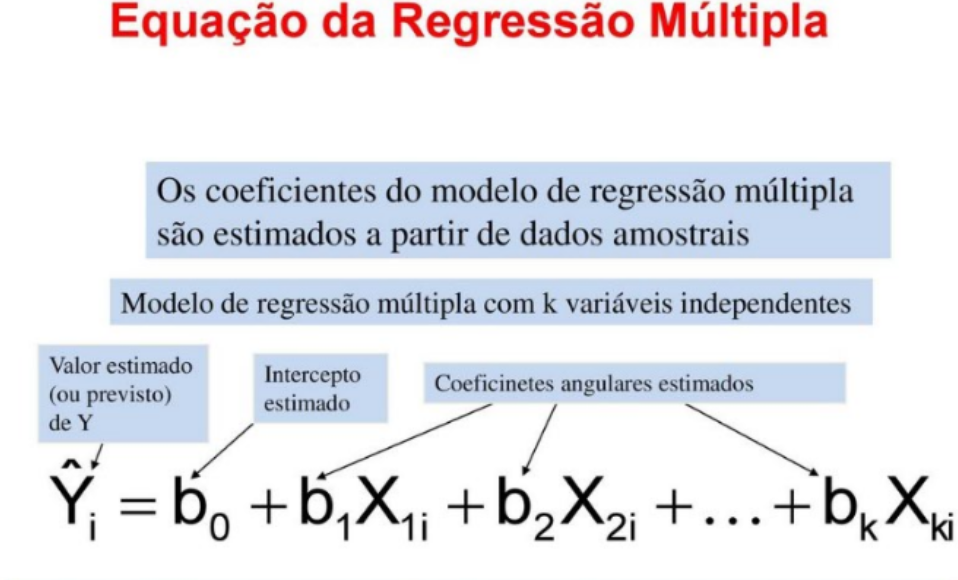

## Regressão multivariável

Desta vez, não se tem apenas uma variável. Então, o problema vai ficar um pouco maior, em vez de se otimizar somente dois parâmetros, deve-se otimizar $n+1$ parâmetros, sendo $n$ o número de variáveis do problema. Neste caso, se tem dez variáveis no problema, portanto serão otimizados no total onze parâmetros. Contudo a hipótese de forma geral será:

$$
y(x_0, x_1, ..., x_n) = \theta_0 + \theta_1 x_0 + \theta_2 x_1 + ... + \theta_{n} x_{n-1}
$$

Como o problema possuí dez variáveis, tem-se:

$$
y(x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9) = \theta_0 + \theta_1 x_0 + \theta_2 x_1 + \theta_3 x_2 + \theta_4 x_3 + \theta_5 x_4 + \theta_6 x_5 + \theta_7 x_6 + \theta_8 x_7 + \theta_9 x_8 + \theta_{10} x_9 
$$

Pode-se definir isto a partir da notação matricial:

$$
y(X) = \theta_0 + X \bullet \theta 
$$

Desta forma, é facil prever usando nosso modelo.

##Utilizando Quadrados Minimos:

Acrescenta uma coluna de 1 ao final de x_treino e x_teste para poder calcular o intercepto $\theta_0$ posteriormente:

In [103]:
x_treino_int = np.c_[x_treino, np.ones(x_treino.shape[0])]
x_teste_int = np.c_[x_teste, np.ones(x_teste.shape[0])]

Calculando os coeficientes por Mínimos Quadrados para cada variavel pelo método "gelsd":

obs: o método "gelsd" usa Decomposição de Valores Singulares (DVS/SVD) e dividir para conquistar e é mais rápido do que o antigo xgelss, especialmente para grandes problemas, mas pode exigir um pouco mais de espaço, dependendo das dimensões da matriz.

In [104]:
%timeit coef, _,_,_ = linalg.lstsq(x_treino_int, y_treino, lapack_driver="gelsd")

10000 loops, best of 5: 177 µs per loop


In [105]:
linalg.lstsq(x_treino_int, y_treino, lapack_driver="gelsd")

(array([ -42.35412 , -239.186243,  545.233467,  346.42602 , -843.253262,
         560.054611,  132.487973,  111.325543,  782.364327,   75.739004,
         153.450615]),
 944766.9411447668,
 11,
 array([18.788405,  1.785889,  1.101186,  0.977906,  0.859576,  0.712057,
         0.694398,  0.640373,  0.580168,  0.238367,  0.081   ]))

Calculando os coeficientes por Mínimos Quadrados para cada variavel pelo método "gelsy":

obs: o método "gelsy" usa Fatoração Ortogonal Completa e é uma versão mais rápida do xgelsy mas requer mais espaço, pois chama algoritmos bloqueantes para realizar a fatoração ortogonal completa.

In [106]:
%timeit coef, _,_,_ = linalg.lstsq(x_treino_int, y_treino, lapack_driver="gelsy")

The slowest run took 5.74 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 104 µs per loop


In [107]:
linalg.lstsq(x_treino_int, y_treino, lapack_driver="gelsy")

(array([ -42.35412 , -239.186243,  545.233467,  346.42602 , -843.253262,
         560.054611,  132.487973,  111.325543,  782.364327,   75.739004,
         153.450615]), array([], dtype=float64), 11, None)

Calculando os coeficientes por Mínimos Quadrados para cada variavel pelo método "gelss":

obs: o método "gelss" usa Decomposição de Valores Singulares (DVS/SVD).

In [108]:
%timeit coef, _,_,_ = linalg.lstsq(x_treino_int, y_treino, lapack_driver="gelss")

The slowest run took 11.62 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 176 µs per loop


In [109]:
linalg.lstsq(x_treino_int, y_treino, lapack_driver="gelss")

(array([ -42.35412 , -239.186243,  545.233467,  346.42602 , -843.253262,
         560.054611,  132.487973,  111.325543,  782.364327,   75.739004,
         153.450615]),
 944766.9411447668,
 11,
 array([18.788405,  1.785889,  1.101186,  0.977906,  0.859576,  0.712057,
         0.694398,  0.640373,  0.580168,  0.238367,  0.081   ]))

Resumindo:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>gelsd</b> - usa Decomposição de Valores Singulares (DVS/SVD) e dividir para conquistar</li>
    <li><b>gelsy</b> - usa Fatoração Ortogonal Completa</li>
    <li><b>gelss</b> - Decomposição de Valores Singulares (DVS/SVD)</li>
</ul>

##1 - Naive Solution / Solução Simples:
$$ x = (A^TA)^{-1}A^T b $$

In [110]:
def ls_naive(A, b):
     return np.linalg.inv(A.T @ A) @ A.T @ b

In [111]:
%timeit coeffs_naive = ls_naive(x_treino_int, y_treino)

The slowest run took 43.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 115 µs per loop


Calculando os coeficientes estimados pelo método da Naive Solution (Solução Simples):

In [112]:
coeffs_naive = ls_naive(x_treino_int, y_treino)

In [113]:
coeffs_naive

array([ -42.35412 , -239.186243,  545.233467,  346.42602 , -843.253262,
        560.054611,  132.487973,  111.325543,  782.364327,   75.739004,
        153.450615])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [114]:
regr_metrics(y_teste, x_teste_int @ coeffs_naive)

(60.33454901429242, 50.167098315037464)

## 2 - Decomposição de Cholesky:

$$ A^TA x = A^T b $$
$$ R^T Rx = A b $$
$$ R^T w = A b $$
$$ w = R x $$

In [115]:
def ls_chol(A, b):
    R = scipy.linalg.cholesky(A.T @ A)
    w = scipy.linalg.solve_triangular(R, A.T @ b, trans='T')
    return scipy.linalg.solve_triangular(R, w)

In [116]:
%timeit coeffs_chol = ls_chol(x_treino_int, y_treino)

The slowest run took 14.79 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 198 µs per loop


Calculando os coeficientes estimados pelo método da Decomposição de Cholesky:

In [117]:
coeffs_chol = ls_chol(x_treino_int, y_treino)
coeffs_chol

array([ -42.35412 , -239.186243,  545.233467,  346.42602 , -843.253262,
        560.054611,  132.487973,  111.325543,  782.364327,   75.739004,
        153.450615])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [118]:
regr_metrics(y_teste, x_teste_int @ coeffs_chol)

(60.334549014292506, 50.16709831503755)

##3 - QR Decomposition / Decomposição QR:

$$ A x = b $$
$$ A = Q R $$
$$ Q R x = b $$

$$ R x = Q^T b $$

Decompondo a matriz $A$ em um produto $A = QR$ de uma matriz ortogonal $Q$ e uma matriz triangular superior $R$:

In [119]:
def ls_qr(A,b):
    Q, R = scipy.linalg.qr(A, mode='economic')
    return scipy.linalg.solve_triangular(R, Q.T @ b)

Calculando o tempo para calcular os coeficientes pela decomposição QR:

In [120]:
%timeit coeffs_qr = ls_qr(x_treino_int, y_treino)

The slowest run took 7.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 129 µs per loop


Calculando os coeficientes estimados pelo método da Decomposição QR:

In [121]:
coeffs_qr = ls_qr(x_treino_int, y_treino)
coeffs_qr

array([ -42.35412 , -239.186243,  545.233467,  346.42602 , -843.253262,
        560.054611,  132.487973,  111.325543,  782.364327,   75.739004,
        153.450615])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [122]:
regr_metrics(y_teste, x_teste_int @ coeffs_qr)

(60.33454901429249, 50.16709831503752)

##4 - SVD (Singular Value Decomposition) / DVS (Decomposição de Valores Singulares:

$$ A x = b $$

$$ A = U \Sigma V $$

$$ \Sigma V x = U^T b $$

$$ \Sigma w = U^T b $$

$$ x = V^T w $$

In [123]:
def ls_svd(A,b):
    m, n = A.shape
    U, sigma, Vh = scipy.linalg.svd(A, full_matrices=False, lapack_driver='gesdd')
    w = (U.T @ b)/ sigma
    return Vh.T @ w

In [124]:
%timeit coeffs_svd = ls_svd(x_treino_int, y_treino)

10000 loops, best of 5: 183 µs per loop


In [125]:
%timeit coeffs_svd = ls_svd(x_treino_int, y_treino)

The slowest run took 6.34 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 174 µs per loop


Calculando os coeficientes estimados pelo método da Decomposição de Valores Singulares (DVS/SVD):

In [126]:
coeffs_svd = ls_svd(x_treino_int, y_treino)
coeffs_svd

array([ -42.35412 , -239.186243,  545.233467,  346.42602 , -843.253262,
        560.054611,  132.487973,  111.325543,  782.364327,   75.739004,
        153.450615])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [127]:
regr_metrics(y_teste, x_teste_int @ coeffs_svd)

(60.334549014292655, 50.1670983150376)

##Comparação entre os Algoritmos:


*   Todos os algoritmos apresentam vantagens em determinadas situações
*   Quando **velocidade** é a unica consideração, a **Decomposição de Cholesky** pode ser o melhor
*   Entretanto, a resolução das equações normais não é sempre estável na presença de erros de arredondamento. Então, os analistas numéricos por muitos anos tem recomendado a **Decomposição QR** como o **método padrão para problemas de Quadrados Minimos**
*   Por outro lado, se A está **próxima de uma matriz com deficiência de posto**, então a Decomposição QR não tem as propriedades de estabilidade ideais e neste caso existem boas razões para utilizar-se a **Decomposição de Valores Singulares (SVD/DVS)**





#CASOS DE USO


In [128]:
dados = pd.read_csv('/content/dataset.csv', sep=';')

Visualizando os dados:

In [129]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia em km </li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima em km</li>
</ul>

Verificando o tamanho do dataset:

In [130]:
dados.shape

(5000, 4)

##Análises Preliminares:

Estatisticas descritivas:

In [131]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


Matriz de correlação:

O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre **-1** e **+1** sendo que **-1** indica associação negativa perfeita e **+1** indica associação positiva perfeita

In [132]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


pode ser visto na tabela acima que a variavel "Dist_Farmacia" não tem muita relevância para estimar o valor do imóvel

Configuração de formatação dos gráficos:

In [133]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

Box plot da variável dependente (y):

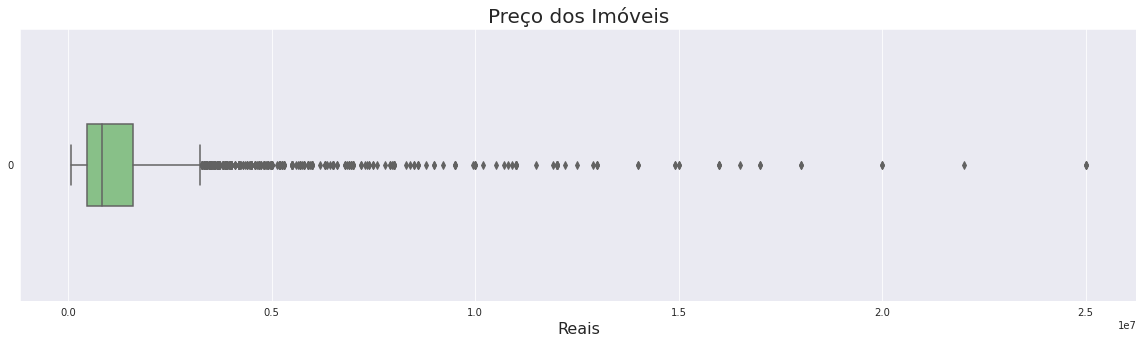

In [134]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Distribuição de frequências da variável dependente (y):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


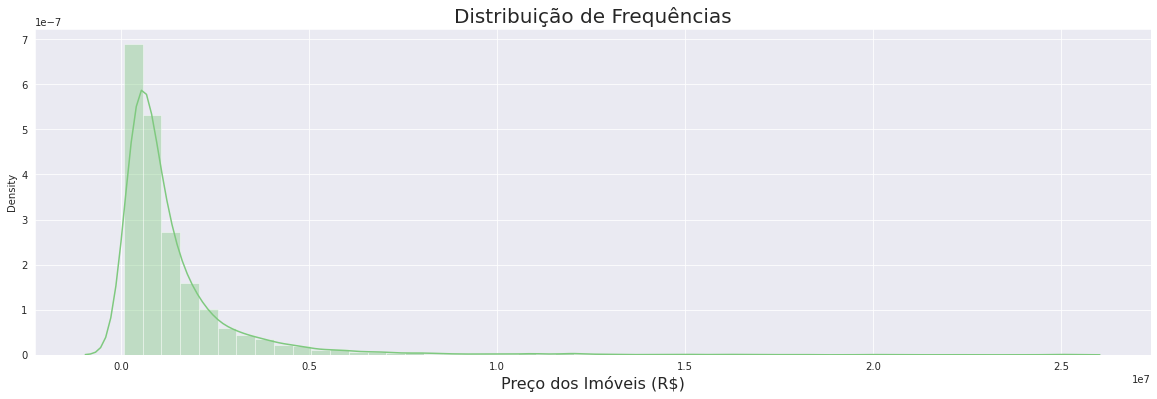

In [135]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

Graficos de dispersão entre as variáveis do dataset:

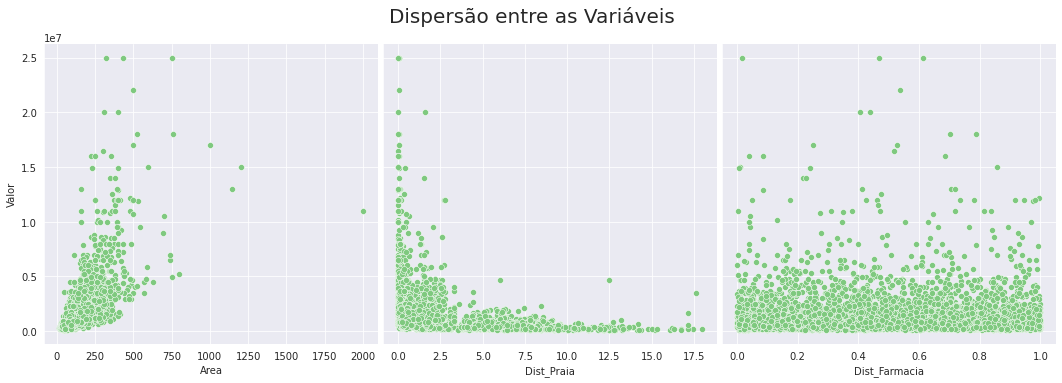

In [136]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Aplicando a transformação logarítmica aos dados do dataset para tornar a distribuição de frequências da variável dependente mais simetrica:

In [137]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

obs: é preciso somar +1 nas variaveis Dist_Praia e Dist_Farmacia pois no dataset existem essas variaveis com valor 0, e o log(0) tende a -inf, e ao somar +1 os valores que antes eram 0, eles tornam-se 1, e como log(1) = 0, é possivel a melhor representação dos dados.

In [138]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


Distribuição de frequências da variável dependente transformada:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


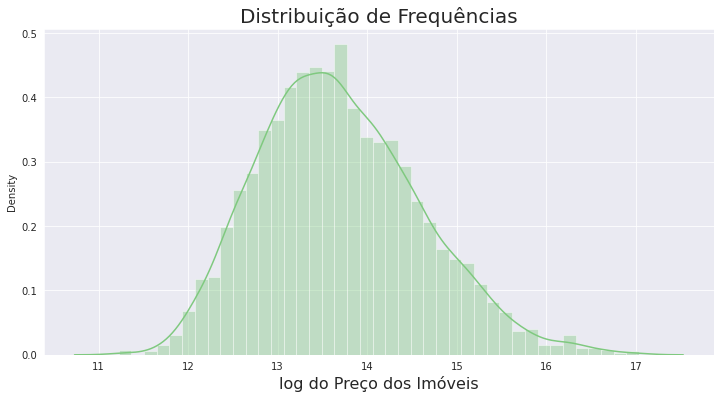

In [139]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

Gráficos de dispersão entre as variáveis transformadas do dataset:

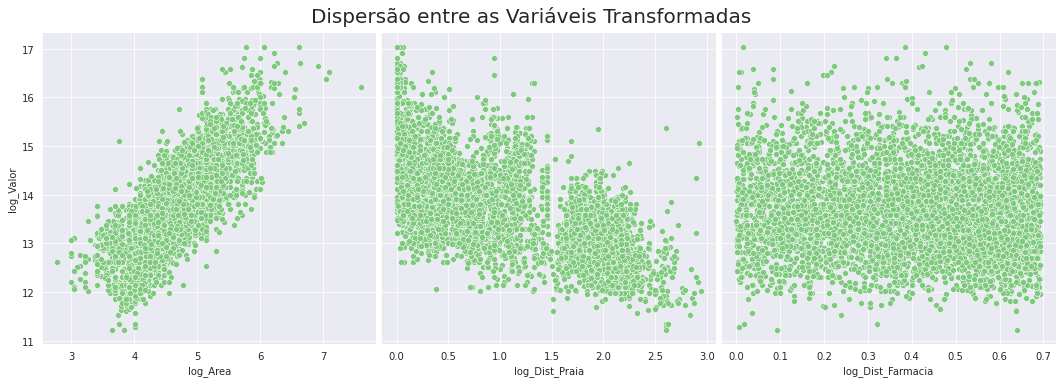

In [140]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

## Criando os Dataset de Treino e Teste:

Criando uma Series (pandas) para armazenar o Valor dos Imóveis (y):

In [141]:
y = dados['log_Valor']

Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X):

In [142]:
x = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

Criando os datasets de treino e de teste:

In [143]:
x_treino2, x_teste2, y_treino2, y_teste2 = train_test_split(x, y, test_size=0.2, random_state=2811)

Acrescenta uma coluna de 1 ao final de x_treino e x_teste para poder calcular o intercepto $\theta_0$ posteriormente:

In [144]:
x_treino_int2 = sm.add_constant(x_treino2)
x_teste_int2 = sm.add_constant(x_teste2)

##1 - Naive Solution / Solução Simples:
$$ x = (A^TA)^{-1}A^T b $$

Calculando os coeficientes estimados pelo método da Naive Solution (Solução simples):

In [145]:
coeffs_naive2 = ls_naive(x_treino_int2, y_treino2)
coeffs_naive2

0    9.341687
1    1.057989
2   -0.490546
3   -0.016689
dtype: float64

In [146]:
coeffs_naive2 = np.array(coeffs_naive2)
coeffs_naive2

array([ 9.341687,  1.057989, -0.490546, -0.016689])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [147]:
regr_metrics(y_teste2, x_teste_int2 @ coeffs_naive2)

(0.3951308365134815, 0.3106786358976045)

## 2 - Decomposição de Cholesky:
$$ A^TA x = A^T b $$
$$ R^T Rx = A b $$
$$ R^T w = A b $$
$$ w = R x $$


In [148]:
def ls_chol(A, b):
    R = scipy.linalg.cholesky(A.T @ A)
    w = scipy.linalg.solve_triangular(R, A.T @ b, trans='T')
    return scipy.linalg.solve_triangular(R, w)

Calculando os coeficientes estimados pelo método da Decomposição de Cholesky:

In [149]:
coeffs_chol2 = ls_chol(x_treino_int2, y_treino2)
coeffs_chol2

array([ 9.341687,  1.057989, -0.490546, -0.016689])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [150]:
regr_metrics(y_teste2, x_teste_int2 @ coeffs_chol2)

(0.3951308365134754, 0.31067863589759953)

##3 - QR Decomposition / Decomposição QR:
$$ A x = b $$
$$ A = Q R $$
$$ Q R x = b $$

$$ R x = Q^T b $$

Decompondo a matriz $A$ em um produto $A = QR$ de uma matriz ortogonal $Q$ e uma matriz triangular superior $R$:

In [151]:
def ls_qr(A,b):
    Q, R = scipy.linalg.qr(A, mode='economic')
    return scipy.linalg.solve_triangular(R, Q.T @ b)

Calculando os coeficientes estimados pelo método da Decomposição QR:

In [152]:
coeffs_qr2 = ls_qr(x_treino_int2, y_treino2)
coeffs_qr2

array([ 9.341687,  1.057989, -0.490546, -0.016689])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [153]:
regr_metrics(y_teste2, x_teste_int2 @ coeffs_qr2)

(0.39513083651347924, 0.310678635897603)

##4 - SVD (Singular Value Decomposition) / DVS (Decomposição de Valores Singulares:
$$ A x = b $$
$$ A = U \Sigma V $$
$$ \Sigma V x = U^T b $$
$$ \Sigma w = U^T b $$
$$ x = V^T w $$

In [154]:
def ls_svd(A,b):
    m, n = A.shape
    U, sigma, Vh = scipy.linalg.svd(A, full_matrices=False, lapack_driver='gesdd')
    w = (U.T @ b)/ sigma
    return Vh.T @ w

Calculando os coeficientes estimados pelo método da Decomposição de Valores Singulares (DVS/SVD):

In [155]:
coeffs_svd2 = ls_svd(x_treino_int2, y_treino2)
coeffs_svd2

array([ 9.341687,  1.057989, -0.490546, -0.016689])

Calculando a Raiz do Erro Quadrático Médio e a Media do Erro Absoluto:

In [156]:
regr_metrics(y_teste2, x_teste_int2 @ coeffs_svd2)

(0.39513083651347936, 0.3106786358976029)